# Example 2: Stickleback geometric morphometrics

In this example phenopype is used to place morphometric landmarks across the anterior half of a stickleback (*Gasterosteus aculeatus*) stained with alizarin red. We also use the image-registration algorithm in `detect_reference` to find a reference card and automatically size and colour-correct the image.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6">
<img src="_figures/ex2_before.jpg">

**Input** - Stained threespine stickleback, photographed in a glycerol bath from a camera stand
</div>
<div class="col-md-6">
<img src="_figures/ex2_after.jpg">

**Results** - 22 landmarks are placed using the landmarks tool from the `measurements` module
</div>
</div>

Images kindly provided by Blake Matthews.

## Background

Functional morphology of organisms is often measured by placing landmarks at specific points that show structural, functional or developmental significance. Lake and stream ecotypes of threespine stickleback differ in their morphology: lake stickleback posess elongated spines and a set of tall bony lateral plates that cover most of the body, whereas stream ecotypes have shorter spines and a reduced plate coverage - i.e., fewer and shorter plates, as reviewed in [Hudson et al. (2021)](https://www.frontiersin.org/articles/10.3389/fevo.2020.611672/full).

## Preparation

This first step creates the necessary working directories and attempts to retrive the configuration template from the online repository, or your own machine, if you downloaded the repo.  

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "example2"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery-" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery-example2.yaml


## Example project

In [2]:
proj = pp.Project("project")

--------------------------------------------
Creating a new phenopype project directory at:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project

Proceed? (y/n)
y

Project "project" successfully created.
--------------------------------------------


In [3]:
## add all stickleback-images from the data folder, but exclude the two that don't belong to the series 
proj.add_files(image_dir = r"../../gallery/data", include="stickle", exclude=["side","top"])

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: stickle, exclude: ['side', 'top'], mode: copy, recursive: False, resize: False, unique: path

Found image stickle1.jpg - phenopype-project folder 0__stickle1 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\stickle1.jpg
Found image stickle2.jpg - phenopype-project folder 0__stickle2 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\stickle2.jpg
Found image stickle3.jpg - phenopype-project folder 0__stickle3 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\stickle3.jpg

Found 3 files
--------------------------------------------


In [5]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\data\0__stickle1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\data\0__stickle2\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\data\0__stickle3\pype_config_v1.yaml (overwritten)


In [6]:
## set the project-wide reference. the reference has its own tag, in case your project uses multiple reference cards
proj.add_reference(reference_image_path= r"../../gallery/data/stickleback_side.jpg", reference_tag="stickle-scale")

Reference set
Reference image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\reference\stickle-scale_full_image.tif
Reference image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\reference\stickle-scale_search_template.tif
Saved reference info to project attributes.
setting active global project reference to "stickle-scale" for 0__stickle1 (active=True)
setting active global project reference to "stickle-scale" for 0__stickle2 (active=True)
setting active global project reference to "stickle-scale" for 0__stickle3 (active=True)


In [7]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath

AUTOLOAD
- reference template image loaded from root directory
Fixed method name
Fixed method name
updating pype config file


------------+++ new pype iteration 2022-01-14 13:49:09 +++--------------




PREPROCESSING
detect_reference
---------------------------------------------------
Reference card found with 234 keypoint matches:
template image has 36.12 pixel per mm.
current image has 34.962 pixel per mm.
= 96.794 %% of template image.
---------------------------------------------------
write_comment
incompatible annotation type supplied - need "comment" type
ID


MEASUREMENT
set_landmark
incompatible annotation type supplied - need "landmark" type


VISUALIZATION
draw_landmark
- "landmark_id" not provided: using last annotation of type "landmark" with ID "a"
draw_reference
- "reference_id" not provided: using last annotation of type "reference" with ID "a"


EXPORT
save_annotation
- creating new annotation file
- writing annotation of type "reference" with 


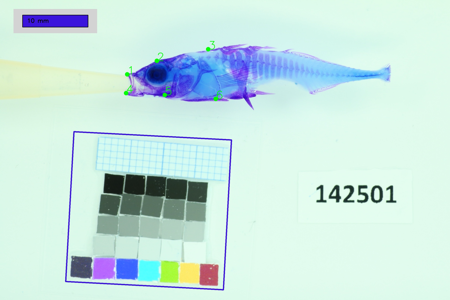
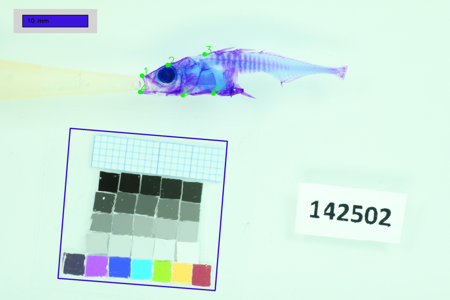
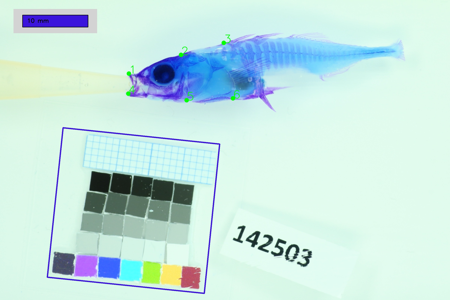


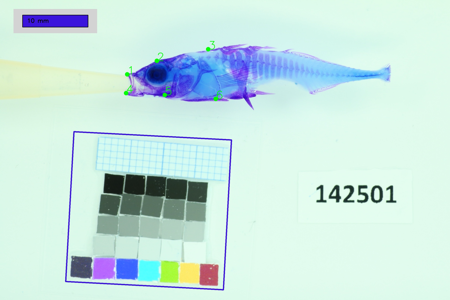
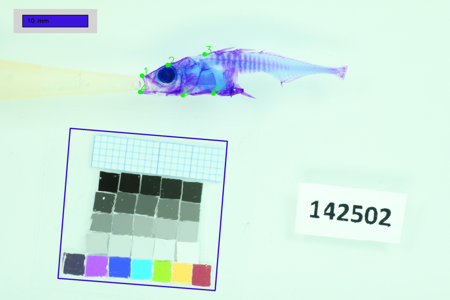
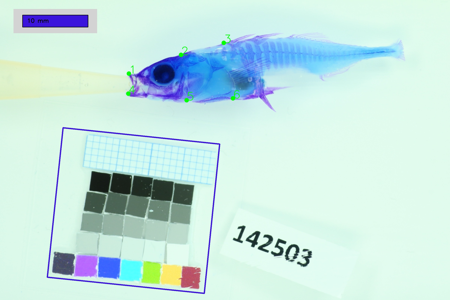

In [8]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg")))

ipyplot.plot_images(canvas_list, max_images=4, img_width=450)

In [9]:
proj.collect_results("v1", "annotations", "annotations")


Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__stickle1
0__stickle1_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\results\annotations\0__stickle1_annotations_v1.json.
Collected annotations_v1.json from 0__stickle2
0__stickle2_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\results\annotations\0__stickle2_annotations_v1.json.
Collected annotations_v1.json from 0__stickle3
0__stickle3_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\results\annotations\0__stickle3_annotations_v1.json.
